# CmpE 549 Assignment 2
**Name:** Emre\
**Surname:** Girgin\
**ID:** 2021700060

In [1]:
import numpy as np
import Bio
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
np.random.seed(42)

# Question 1

In [2]:
gene_expression_path = "./gene_expression_matrix.txt"

## a.

In [3]:
dataset = np.loadtxt(gene_expression_path)
print("Dataset shape: {}".format(dataset.shape))
print("First three columns: \n {}".format(dataset[:, :3]))

Dataset shape: (62, 2000)
First three columns: 
 [[ 8589.4163  5468.2409  4263.4075]
 [ 3825.705   6970.3614  5369.9688]
 [ 3230.3287  3694.45    3400.74  ]
 [ 7126.5988  3779.0682  3705.5537]
 [ 9330.6787  7017.2295  4723.7825]
 [14876.407   3201.9045  2327.6263]
 [ 4469.09    5167.0568  4773.68  ]
 [ 4913.7988  5215.0477  4288.6162]
 [ 7144.4062  2071.4023  1619.2762]
 [ 5382.3938  3848.4432  3372.4887]
 [ 7434.8213  6471.2114  5029.6175]
 [ 4214.9     2213.3568  1611.5188]
 [ 8865.4587  5447.1864  4887.0575]
 [ 5934.8888  3744.9886  3528.8337]
 [ 5821.6175  3748.2477  3439.9538]
 [ 9767.0275  9785.775   8605.0438]
 [13324.729   9505.0341  7740.9875]
 [12977.712   7565.6159  5735.2   ]
 [ 8753.2388  8978.1341  7777.8412]
 [ 5012.02    1383.4886  1269.6487]
 [ 6904.8012  2260.7773  1987.0012]
 [ 8347.9838  9852.2977  8178.965 ]
 [ 5100.5363  3343.3205  2925.67  ]
 [ 4554.5762  3139.3114  2958.4025]
 [ 5466.93   10152.273   7760.9175]
 [ 4201.5075  2425.6273  2228.8175]
 [ 9128.1188  5

## b.

In [4]:
def standardize_gene_exp(dataset):
    mean = np.mean(dataset, axis=0)
    std = np.std(dataset, axis=0)
    return (dataset - mean) / std 

In [5]:
normalized_dataset = standardize_gene_exp(dataset)
print("The first three columns of the standardized dataset: \n {}".format(normalized_dataset[:, :3]))

The first three columns of the standardized dataset: 
 [[ 0.51292947  0.23088092  0.09353633]
 [-1.03981707  0.92273048  0.70714741]
 [-1.23388184 -0.58609512 -0.3848306 ]
 [ 0.03611955 -0.5471215  -0.21580511]
 [ 0.75454626  0.94431708  0.34882377]
 [ 2.56219368 -0.81295267 -0.97989429]
 [-0.83010373  0.09216096  0.37649296]
 [-0.68514951  0.1142647   0.10751508]
 [ 0.04192392 -1.33364156 -1.37268904]
 [-0.53240951 -0.51516863 -0.40049653]
 [ 0.13658563  0.69283101  0.51841559]
 [-0.91295775 -1.26825988 -1.37699068]
 [ 0.60290635  0.2211836   0.43936313]
 [-0.35232204 -0.56281795 -0.3138    ]
 [-0.38924318 -0.56131687 -0.36308574]
 [ 0.89677551  2.2194591   2.50106326]
 [ 2.0564194   2.09015492  2.02192621]
 [ 1.94330813  1.19689394  0.90967565]
 [ 0.56632792  1.8474743   2.04236235]
 [-0.653134   -1.65048218 -1.56656471]
 [-0.03617607 -1.24641886 -1.16877794]
 [ 0.43423379  2.25009826  2.26479377]
 [-0.62428184 -0.74781902 -0.64826672]
 [-0.80223924 -0.84178193 -0.63011587]
 [-0.5048

## c.

In [6]:
def kmeans_iter(dataset, cluster_centers):
    # our dataset only has two classes
    dist2_center0 = np.linalg.norm(dataset - cluster_centers[0], axis=1)
    dist2_center1 = np.linalg.norm(dataset - cluster_centers[1], axis=1)
        
    c0_mask = dist2_center0 < dist2_center1
    
    # predictions
    preds = np.zeros((dataset.shape[0]), dtype=np.int8)
    preds[c0_mask] = 0
    preds[~c0_mask] = 1
    
    # new centers
    c0_samples = dataset[c0_mask]
    c1_samples = dataset[~c0_mask]
    
    new_c0_center = np.mean(c0_samples, axis=0)
    new_c1_center = np.mean(c1_samples, axis=0)
    
    return preds, np.vstack([new_c0_center, new_c1_center])

def kmeans(dataset):   
    # initate cluster centers
    centers = np.random.normal(loc=0, scale=1, size=(2, dataset.shape[1]))
    
    while True:
        preds, new_centers = kmeans_iter(dataset, centers)
        
        delta = np.linalg.norm(centers - new_centers, axis=1)
        if np.sum(delta) < 0.1:
            return preds, new_centers
        centers = new_centers
        
    return None

In [7]:
preds, new_centers = kmeans(normalized_dataset)

In [8]:
sub_preds = preds[:-1] # exclude unknown patient
c0_perc = len(sub_preds[sub_preds == 0]) / len(sub_preds)
c1_perc = len(sub_preds[sub_preds == 1]) / len(sub_preds)
print("Percentage of cancer patients in cluster 0: {:.2f}".format(c0_perc))
print("Percentage of cancer patients in cluster 1: {:.2f}".format(c1_perc))
print("Cluster of the unknown patient: {}".format(preds[-1]))

Percentage of cancer patients in cluster 0: 0.31
Percentage of cancer patients in cluster 1: 0.69
Cluster of the unknown patient: 1


## d.

40 of the 61 patients have colon cancer, whereas the resting 21 of the 61 is healty. This means their percentages are around 66% and 33% respectively. The percentages of the clusters are also 69% and 31% which is close to groundtruths. This shows K-Means algorithm did a relatively good job. Moreover, the unknown patient is assigned to the major cluster which is probably the cluster of the patients who have colon cancer. **Thus we have an intuition about the unknown patient has colon cancer.** 

## e.

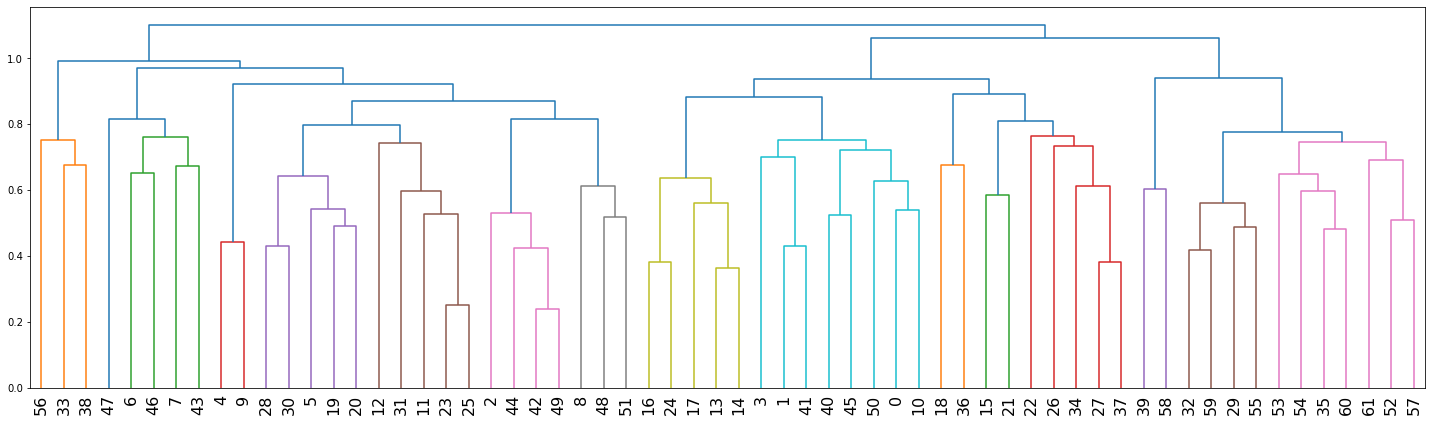

In [9]:
Z = linkage(normalized_dataset, method="average", metric="correlation")

fig = plt.figure(figsize=(25, 7))

dn = dendrogram(Z)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=16)
plt.show()

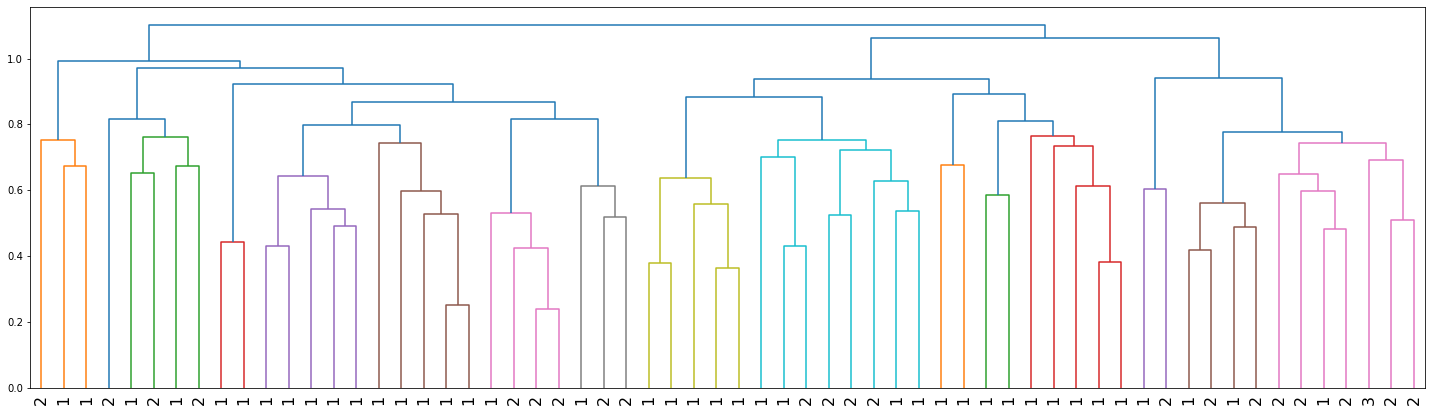

In [10]:
ground_truth = np.asarray([1] * 40 + [2] * 21 + [3]).reshape(-1)

fig = plt.figure(figsize=(25, 7))

dn = dendrogram(Z, labels=ground_truth.tolist())

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=16)

plt.show()

## f.

The closer patients are more visible in hierachical clustering. This means we can apply the majority voting technique in the brach of which 62nd patient is under (It is 61th in the dendogram since patient ids are zero-indexed.). Therefore, we see that the majority of the samples closer to the patient 62 are in class 2, which is class id for healthy people. (Check rightmost pink branch.) **Thus we can think of that the last patient in healthy.**

# Question 2

Acknowledgements: \
 - First I tried to use the original dataset. However, I ended up with lots of sparse graphs with lots of missing edges. 
 - Then I switched to the toy dataset, which is not a cycler graph. I was able to construct the genome exactly. (Not using this code, I changed it for the second dataset.)
 - Then I tried the algorithm on the second dataset but, again, I've ended up with three graphs rather than a connected one. 
 - Then I realized that if I only use the first element of the paired reads, I have a acyclic single graph. Thus I choosed to move with it.
 - However, the algorithm we discussed in the class was something similar to [Hierholzer's Algoritm](https://www.geeksforgeeks.org/hierholzers-algorithm-directed-graph/) which finds Eulerian Circuits (Cycles) on a given directed graph but not the paths. The graph I constructed using the second dataset's first pairs was acyclic, so I added an extra edge from the sink node to source node to have a cyclic one. In that way, I was able to construct a eulerian path from that graph. However, there was not a way to check it because I'm not using the pairs.
 - To wrap up, I think my subsection **a is correct** (I checked it with toy dataset in both paired and non-paired cases). My subsection **b is taken from an external source**, which I cited above. I could not think of a solution that transforms our problem to the problem we discussed in the class. I just adjusted my adjacency matrix to be consistent with that oursourced implementation. The subsection **c is written for the non-paired case**. Since the code below only works for non-paired case I implemented that but I provided a **pseudo-code for the paired case**, which I think you can take that into account for grading. 

In [11]:
toy_dataset = """GAGA|TTGA
TCGT|GATG
CGTG|ATGT
TGGT|TGAG
GTGA|TGTT
GTGG|GTGA
TGAG|GTTG
GGTC|GAGA
GTCG|AGAT"""
"""
read_pairs = []
for line in toy_dataset.split("\n"):
    read_pairs.append(line.split("|"))
print(read_pairs)
"""

'\nread_pairs = []\nfor line in toy_dataset.split("\n"):\n    read_pairs.append(line.split("|"))\nprint(read_pairs)\n'

In [12]:
read_pairs_path = "string_reconstruction_from_read_pairs.txt"

In [13]:
read_pairs = []

with open(read_pairs_path, "r") as f:
    data = f.readlines()

k = data[1].split()[0]
d = data[1].split()[1]
output = data[-1]
for line in data[2:-2]:
    read_pairs.append(line.split("\n")[0].split("|"))

## a.

In [14]:
class Node:
    def __init__(self, data, idx):
        self.data = data
        self.id = idx
        self.incoming = 0
        self.outgoing = 0
        self.children = []
        self.edges = []
        
    def add_child(self, child, edge):
        self.outgoing += 1
        child.incoming += 1
        self.children.append(child)
        self.edges.append(Edge(edge, source=self, sink=child))
    
    def __str__(self):
        return self.data
    
    def __eq__(self, other):
        if(self.data == other.data):
            return True
        else:
            return False
    
class Edge:
    def __init__(self, data, source=None, sink=None):
        self.data = data
        self.source = source
        self.sink = sink
        self.visited = False
        
    def __str__(self):
        return self.data
        

        

In [15]:
nodes = {}
edges = {}


for idx, pair in enumerate(read_pairs):
    # unfortunately only taking first element of the pairs
    
    source = pair[0][:-1]
    sink = pair[0][1:]
    
    #source = str([pair[0][:-1], pair[1][:-1]])
    #sink = str([pair[0][1:], pair[1][1:]])
    
    if not source in nodes.keys():
        nodes[source] = Node(source, len(nodes.keys()))
    
    if not sink in nodes.keys():
        nodes[sink] = Node(sink, len(nodes.keys()))
    
    nodes[source].add_child(child = nodes[sink], edge=pair)
    

In [16]:
adjacency_matrix = np.zeros((len(nodes.keys()), len(nodes.keys())))

for idx, node in enumerate(nodes.keys()):
    for child in nodes[node].children:
        sink_id = list(nodes.keys()).index(child.data)
        adjacency_matrix[idx, sink_id] = 1

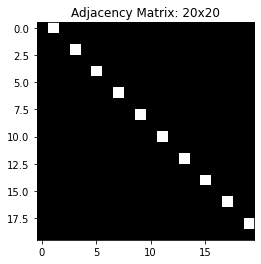

In [17]:
# Remember: the direction is from row id to column id
plt.imshow(adjacency_matrix[:20, :20], cmap="gray")
plt.title("Adjacency Matrix: 20x20")
plt.show()

## b.

In [18]:
hierholzer_adj = []
for idx, node in enumerate(nodes.keys()):
    node_adj = []
    for child in nodes[node].children:
        sink_id = list(nodes.keys()).index(child.data)
        node_adj.append(sink_id)

    hierholzer_adj.append(node_adj)

In [19]:
def find_start_end(adj):
    row_sum = np.sum(adj, axis=1)
    sink_id = np.arange(0, len(adj), 1)[row_sum == 0]
    
    col_sum = np.sum(adj, axis=0)
    source_id = np.arange(0, len(adj), 1)[col_sum == 0]
    
    return source_id[0], sink_id[0]
    
start, sink = find_start_end(adjacency_matrix)   
hierholzer_adj[sink].append(start)

In [20]:
### CAUTION!!! Taken from: https://www.geeksforgeeks.org/hierholzers-algorithm-directed-graph/

adj_copy = hierholzer_adj.copy()
# Python3 program to print Eulerian circuit in given
# directed graph using Hierholzer algorithm
def printCircuit(adj):
  
    # adj represents the adjacency list of
    # the directed graph
    # edge_count represents the number of edges
    # emerging from a vertex
    edge_count = dict()
  
    for i in range(len(adj)):
  
        # find the count of edges to keep track
        # of unused edges
        edge_count[i] = len(adj[i])
  
    if len(adj) == 0:
        return # empty graph
  
    # Maintain a stack to keep vertices
    curr_path = []
  
    # vector to store final circuit
    circuit = []
  
    # start from any vertex
    curr_path.append(0)
    curr_v = 0 # Current vertex
  
    while len(curr_path):
  
        # If there's remaining edge
        if edge_count[curr_v]:
  
            # Push the vertex
            curr_path.append(curr_v)
  
            # Find the next vertex using an edge
            next_v = adj[curr_v][-1]
  
            # and remove that edge
            edge_count[curr_v] -= 1
            adj[curr_v].pop()
  
            # Move to next vertex
            curr_v = next_v
  
        # back-track to find remaining circuit
        else:
            circuit.append(curr_v)
  
            # Back-tracking
            curr_v = curr_path[-1]
            curr_path.pop()
  
    return circuit
    """# we've got the circuit, now print it in reverse
    for i in range(len(circuit) - 1, -1, -1):
        print(circuit[i], end = "")
        if i:
            print(" -> ", end = "")"""
rev_circuit = printCircuit(adj_copy)
rev_circuit.reverse()

## c.

In [21]:
# pseudo-code for paired case
"""
def construct_genome(path, k, d):
    # construct two pairs as two different strings
    s1 = path[0].data[0]
    s2 = path[0].data[1]
    
    # enlarge strings one by one
    for node in path:
        s1 += node.data[0][-1]
        s2 += node.data[1][-1]
        
    # the first k + d elements are from s1 and the rest is s2
    # or you can take the last ones from s2 and use s1 instead
    return s1[:k+d] + s2
"""

'\ndef construct_genome(path, k, d):\n    # construct two pairs as two different strings\n    s1 = path[0].data[0]\n    s2 = path[0].data[1]\n    \n    # enlarge strings one by one\n    for node in path:\n        s1 += node.data[0][-1]\n        s2 += node.data[1][-1]\n        \n    # the first k + d elements are from s1 and the rest is s2\n    # or you can take the last ones from s2 and use s1 instead\n    return s1[:k+d] + s2\n'

In [22]:
def construct_genome(circuit, k, d):
    s = list(nodes.keys())[circuit[0]]
    for i in circuit[1:]:
        s += list(nodes.keys())[i][-1]
        
    return s
s_final = construct_genome(rev_circuit, k, d)

In [23]:
print("First 200: \n {}".format(s_final[:200]))
print("Last 200: \n {}".format(s_final[-200:]))

First 200: 
 AAACTTTACAATCATTAGGGTCGCCAGTGGAGAATCTATAGAATCTTTTCTACAGGCTACAGAGAAGCATTTTTCACAGGACCGCGTGGCGCAAACAATCCGATGGGGACCATCTGTGAACTCCCATACGTGACTATTCTGTGTCACATGAGGGGAGCTAGGGGGATTGAGTGCTCATGTCGGTTGGAGACCATTTTGAG
Last 200: 
 TGCTCACTCGATTGGGAATCTAATGCGGTCTGCCATGGGGCGAGTTAATTGAAGTTTGCCTAGACACCGCTGAGGCTGGTTCGACATACCCTTAGGGAGGCCAAGCTATATAAAACCAAGATCATTGACCCCCTACGTGATACGTGATTTCAAACTTTACAATCATTAGGGTCGCCAGTGGAGAATCTATAGAATCTTTT


## d.

If we had 2N independent pairs instead of N paired reads, obtaining the final genome sequence would be harder. The reason is the paired samples allow us to reduce possible sequences since they add additional constraint. Also, in real cases there might be missing parts in the genome reads due to errors happend while reading. The paired samples provides us redundancy which provides more error-tolerant genome construction.